# PROBLEMA 4 - Equação Diferencial de Segunda Ordem

Resolver a Lei Fundamental da Dinâmica (LFD) para determinar a posição do objeto em queda vertical, submetido à força de arraste do ar e à força peso:

$$m\frac{d^2x}{dt^2}(t) = mg - \alpha v(t)$$

com condições iniciais: $x(t_0) = x_0$ e $\frac{dx}{dt}(t_0) = v_0$

Transformamos a EDO de segunda ordem em um sistema de EDOs de primeira ordem:
- $u_1 = x$ (posição)
- $u_2 = v = \frac{dx}{dt}$ (velocidade)

Sistema resultante:
$$\frac{du_1}{dt} = u_2$$
$$\frac{du_2}{dt} = g - \frac{\alpha}{m}u_2$$

Método das diferenças finitas:
$$u_{1,j+1} = u_{1,j} + u_{2,j} \delta t$$
$$u_{2,j+1} = u_{2,j} + f(x, u_{1,j}, u_{2,j}) \delta t$$

Solução analítica para comparação:
$$x(t) = \frac{mg}{\alpha}\left(t + \frac{m}{\alpha}(e^{-\frac{\alpha}{m}t} - 1)\right) - \frac{mv_0}{\alpha}(e^{-\frac{\alpha}{m}t} - 1) + x_0$$

In [2]:
using Plots

# Parâmetros do problema
m::Float64 = 1.0      # massa (kg)
g::Float64 = 9.8      # aceleração da gravidade (m/s²)
alpha::Float64 = 1.0  # coeficiente de arraste (N/(m/s))
t0::Float64 = 0.0     # tempo inicial (s)
t1::Float64 = 5.0     # tempo final (s)
x0::Float64 = 0.0     # posição inicial (m)
v0::Float64 = 0.0     # velocidade inicial (m/s)

println("Parâmetros do problema:")
println("Massa: $m kg")
println("Gravidade: $g m/s²")
println("Coeficiente de arraste: $alpha N/(m/s)")
println("Condições iniciais: x₀ = $x0 m, v₀ = $v0 m/s")
println("Intervalo de tempo: [$t0, $t1] s")

Parâmetros do problema:
Massa: 1.0 kg
Gravidade: 9.8 m/s²
Coeficiente de arraste: 1.0 N/(m/s)
Condições iniciais: x₀ = 0.0 m, v₀ = 0.0 m/s
Intervalo de tempo: [0.0, 5.0] s


In [3]:
# Solução analítica para a posição
function solucao_analitica_x(t, m, g, alpha, x0, v0)
    exp_term = exp(-alpha * t / m)
    termo1 = (m * g / alpha) * (t + (m / alpha) * (exp_term - 1))
    termo2 = -(m * v0 / alpha) * (exp_term - 1)
    return termo1 + termo2 + x0
end

# Solução analítica para a velocidade
function solucao_analitica_v(t, m, g, alpha, v0)
    exp_term = exp(-alpha * t / m)
    return (m * g / alpha) * (1 - exp_term) + v0 * exp_term
end

# Sistema de equações para o problema da queda com arraste
function sistema_queda(t, u)
    x, v = u[1], u[2]
    dxdt = v
    dvdt = g - (alpha / m) * v
    return [dxdt, dvdt]
end

# Método das diferenças finitas (Euler) para sistema de EDOs
function euler_sistema(t0, t1, u0, n, f_sistema)
    dt = (t1 - t0) / (n - 1)
    t = Vector{Float64}(undef, n)
    u = Matrix{Float64}(undef, n, length(u0))
    
    t[1] = t0
    u[1, :] = u0
    
    for i = 1:(n-1)
        t[i+1] = t[i] + dt
        du_dt = f_sistema(t[i], u[i, :])
        u[i+1, :] = u[i, :] + dt * du_dt
    end
    
    return t, u
end

euler_sistema (generic function with 1 method)

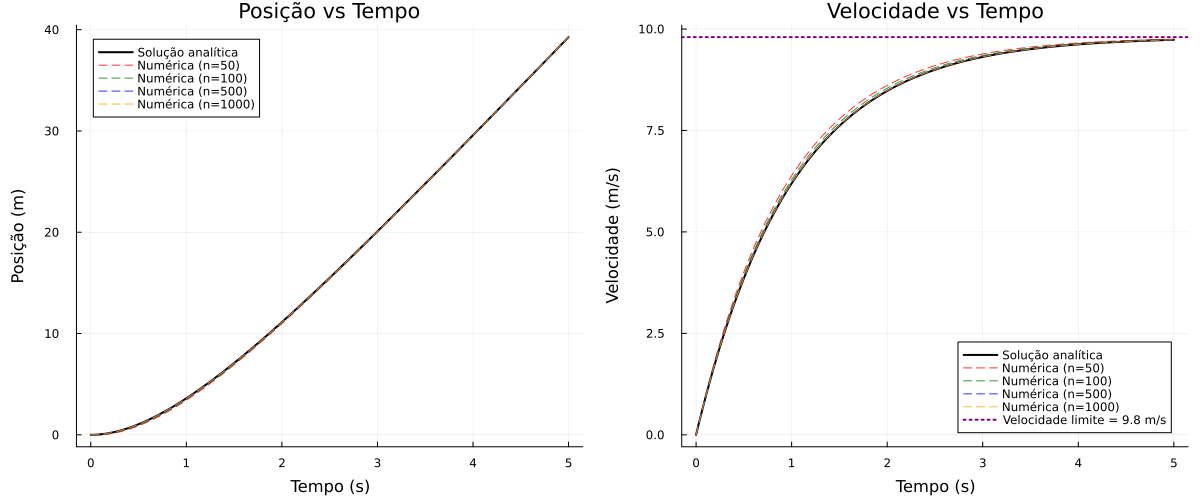

In [ ]:
# Resolver numericamente com diferentes números de pontos
n_values = [50, 100, 500]
cores = [:red, :green, :blue, :orange]

# Solução analítica para comparação
t_analitico = range(t0, t1, length=1000)
x_analitico = [solucao_analitica_x(t, m, g, alpha, x0, v0) for t in t_analitico]
v_analitico = [solucao_analitica_v(t, m, g, alpha, v0) for t in t_analitico]

# Subplot 1: Posição vs Tempo
p1 = plot(t_analitico, x_analitico, linewidth=2, color=:black, 
          label="Solução analítica", xlabel="Tempo (s)", ylabel="Posição (m)",
          title="Posição vs Tempo")

for (i, n) in enumerate(n_values)
    t_num, u_num = euler_sistema(t0, t1, [x0, v0], n, sistema_queda)
    x_num = u_num[:, 1]
    plot!(p1, t_num, x_num, line=:dash, color=cores[i], 
          label="Numérica (n=$n)", alpha=0.8)
end

# Subplot 2: Velocidade vs Tempo
p2 = plot(t_analitico, v_analitico, linewidth=2, color=:black,
          label="Solução analítica", xlabel="Tempo (s)", ylabel="Velocidade (m/s)",
          title="Velocidade vs Tempo")

for (i, n) in enumerate(n_values)
    t_num, u_num = euler_sistema(t0, t1, [x0, v0], n, sistema_queda)
    v_num = u_num[:, 2]
    plot!(p2, t_num, v_num, line=:dash, color=cores[i],
          label="Numérica (n=$n)", alpha=0.8)
end

# Linha para velocidade limite
v_limite = m * g / alpha
hline!(p2, [v_limite], line=:dot, linewidth=2, color=:purple,
       label="Velocidade limite = $(round(v_limite, digits=1)) m/s")

display(plot(p1, p2, size=(1200,500), layout=grid(1, 2),
     bottom_margin=0.5*Plots.cm, left_margin=0.7*Plots.cm))

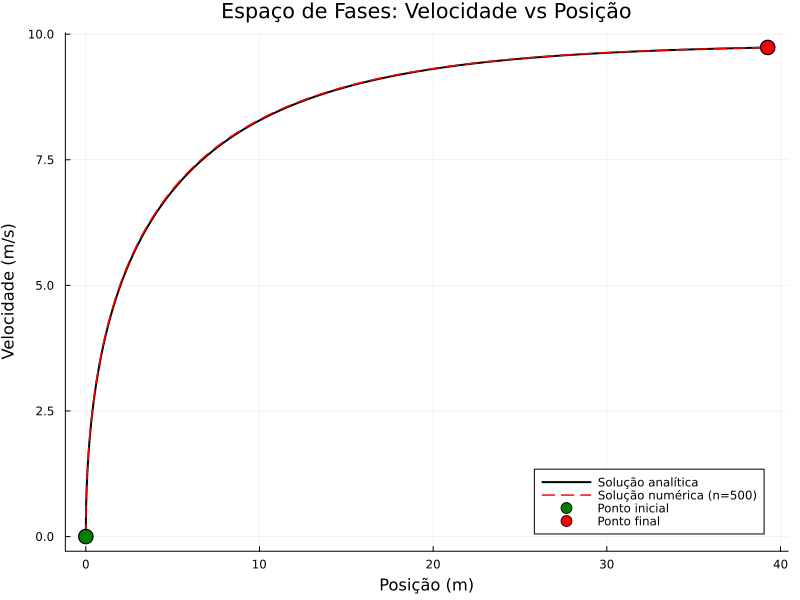


Trajetória no espaço de fases:
Início: x = 0.0 m, v = 0.0 m/s
Final:  x = 39.26 m, v = 9.74 m/s


In [5]:
# Gráfico do espaço de fases (velocidade vs posição)
p5 = plot(x_analitico, v_analitico, linewidth=2, color=:black,
          label="Solução analítica", xlabel="Posição (m)", ylabel="Velocidade (m/s)",
          title="Espaço de Fases: Velocidade vs Posição")

# Solução numérica
t_num, u_num = euler_sistema(t0, t1, [x0, v0], 500, sistema_queda)
x_num = u_num[:, 1]
v_num = u_num[:, 2]
plot!(p5, x_num, v_num, line=:dash, linewidth=1.5, color=:red,
      label="Solução numérica (n=500)")

# Marcar pontos inicial e final
scatter!(p5, [x0], [v0], markersize=8, color=:green, label="Ponto inicial")
scatter!(p5, [x_num[end]], [v_num[end]], markersize=8, color=:red, label="Ponto final")

display(plot!(p5, size=(800,600)))

println("\nTrajetória no espaço de fases:")
println("Início: x = $x0 m, v = $v0 m/s")
println("Final:  x = $(round(x_num[end], digits=2)) m, v = $(round(v_num[end], digits=2)) m/s")

## Análise dos Resultados

### Observações Principais:

1. **Convergência para velocidade limite**: O objeto atinge aproximadamente a velocidade limite $v_{limite} = \frac{mg}{\alpha} = 9.8$ m/s

2. **Precisão do método numérico**: O método de Euler converge para a solução analítica

3. **Comportamento físico**: 
   - Inicialmente, a aceleração é máxima (g = 9.8 m/s²)
   - À medida que a velocidade aumenta, a força de arraste cresce
   - Eventualmente, peso e arraste se equilibram (velocidade limite)

### Equações Implementadas:

- **Sistema de EDOs**:
  - $\frac{dx}{dt} = v$
  - $\frac{dv}{dt} = g - \frac{\alpha}{m}v$

- **Método de Euler**:
  - $x_{j+1} = x_j + v_j \Delta t$
  - $v_{j+1} = v_j + (g - \frac{\alpha}{m}v_j) \Delta t$

- **Solução analítica**:
  - $x(t) = \frac{mg}{\alpha}\left(t + \frac{m}{\alpha}(e^{-\frac{\alpha}{m}t} - 1)\right) - \frac{mv_0}{\alpha}(e^{-\frac{\alpha}{m}t} - 1) + x_0$

## Análise dos Resultados

### Observações Principais:

1. **Convergência para velocidade limite**: O objeto atinge aproximadamente a velocidade limite $v_{limite} = \frac{mg}{\alpha} = 9.8$ m/s

2. **Precisão do método numérico**: O método de Euler converge para a solução analítica à medida que aumentamos o número de pontos

3. **Comportamento físico**: 
   - Inicialmente, a aceleração é máxima (g = 9.8 m/s²)
   - À medida que a velocidade aumenta, a força de arraste cresce
   - Eventualmente, peso e arraste se equilibram (velocidade limite)

4. **Erro numérico**: O erro diminui com o aumento do número de pontos, mas o método de Euler é de primeira ordem, então a convergência é relativamente lenta

### Equações Implementadas:

- **Sistema de EDOs**:
  - $\frac{dx}{dt} = v$
  - $\frac{dv}{dt} = g - \frac{\alpha}{m}v$

- **Método de Euler**:
  - $x_{j+1} = x_j + v_j \Delta t$
  - $v_{j+1} = v_j + (g - \frac{\alpha}{m}v_j) \Delta t$

- **Solução analítica**:
  - $x(t) = \frac{mg}{\alpha}\left(t + \frac{m}{\alpha}(e^{-\frac{\alpha}{m}t} - 1)\right) - \frac{mv_0}{\alpha}(e^{-\frac{\alpha}{m}t} - 1) + x_0$